In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1>Chi Square Test of Independence</h1>

I used the GapMinder data set to investigate the three variables incomeperperson, armedforcesrate, and polityscore.

<h4>SET UP</h4>

<i>Import the packages to use</i>

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as scistat
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

<i>Set some options</i>

In [4]:
pd.set_option('display.max_rows', 200)
pd.set_option('expand_frame_repr', False)
pd.set_option('display.float_format', '{:,.2f}'.format)

<i>Read in the data</i>

In [5]:
data = pd.read_csv('../gapminder.csv', low_memory=False).set_index('country')
data = data[['incomeperperson','armedforcesrate','polityscore']]
data = data[(data['incomeperperson'] != ' ') & (data['armedforcesrate'] != ' ') & (data['polityscore'] != ' ')]
data.loc[:,'incomeperperson'] = pd.to_numeric(data.loc[:,'incomeperperson']).astype('int')
data.loc[:,'armedforcesrate'] = pd.to_numeric(data.loc[:,'armedforcesrate']).round(4)

<i>Map some values so the analysis doesn't get too big to interpret</i>

In [6]:
data.polityscore = data.polityscore \
    .map({'-10':'neg','-9':'neg','-8':'neg','-7':'neg','-6':'neg','-5':'neg'
         ,'-4':'neg','-3':'neg','-2':'neg','-1':'neg','0':'pos','1':'pos'
         ,'2':'pos','3':'pos','4':'pos','5':'pos','6':'pos','7':'pos'
         ,'8':'pos','9':'pos','10':'pos'})
data.polityscore = data.polityscore.map({'neg':0,'pos':1})
data.loc[data.incomeperperson < 5000,'incomeperperson'] = 5000
data.loc[(data.incomeperperson > 5000)&(data.incomeperperson <= 10000),'incomeperperson'] = 10000
data.loc[(data.incomeperperson > 10000)&(data.incomeperperson <= 25000),'incomeperperson'] = 25000
data.loc[(data.incomeperperson > 25000)&(data.incomeperperson < 40000),'incomeperperson'] = 40000

<h4>CHI SQUARED ANALYSIS</h4>

<i>The contingency table of observed counts</i>

In [7]:
ct1 = pd.crosstab(data['polityscore'],data['incomeperperson'])
colsum1 = ct1.sum(axis = 0)
colpct1 = ct1/colsum1
print('The crosstab table of value counts')
ct1
print('The column sums for each explanatory variable')
colsum1
print('The column percentages for the crosstabs table')
colpct1

The crosstab table of value counts


incomeperperson,5000,10000,25000,40000
polityscore,,,,
0,33,4,3,2
1,63,17,13,14


The column sums for each explanatory variable


incomeperperson
5000     96
10000    21
25000    16
40000    16
dtype: int64

The column percentages for the crosstabs table


incomeperperson,5000,10000,25000,40000
polityscore,,,,
0,0.34,0.19,0.19,0.12
1,0.66,0.81,0.81,0.88


<i>The test statistics</i>

In [8]:
cs1 = scistat.chi2_contingency(ct1)
cs1

(5.331542917011042,
 0.1490686642960721,
 3,
 array([[ 27.06040268,   5.91946309,   4.51006711,   4.51006711],
        [ 68.93959732,  15.08053691,  11.48993289,  11.48993289]]))

<i>Graphical Views</i>

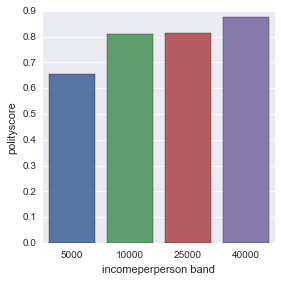

In [9]:
data.loc[:,'incomeperperson'] = data.loc[:,'incomeperperson'].astype('category')
sb.factorplot(x = 'incomeperperson', y = 'polityscore', data = data, kind = 'bar', ci = None)
plt.xlabel('incomeperperson band')
plt.ylabel('polityscore')

<i>If I rejected my null hypothesis (which I am not doing on a p-value of 0.149)</i>

My Bonferroni Adjustment number is:
<br>0.05 / 6 = 0.00833

<i>Post hoc test examples - they are not needed in this instance</i>

In [14]:
#ONE
data['comparisonvalues'] = data['incomeperperson'].map({5000.0:5000.0,10000.0:10000.0})
ct2 = pd.crosstab(data['polityscore'],data['comparisonvalues'])
print('The crosstab table of value counts')
ct2
#The test statistics
cs2 = scistat.chi2_contingency(ct2)
cs2

The crosstab table of value counts


comparisonvalues,5000.0,10000.0
polityscore,,
0,33,4
1,63,17


(1.2303228312017374,
 0.26734426427928082,
 1,
 array([[ 30.35897436,   6.64102564],
        [ 65.64102564,  14.35897436]]))

In [18]:
#TWO
data['comparisonvalues'] = data['incomeperperson'].map({5000.0:5000.0,25000.0:25000.0})
ct3 = pd.crosstab(data['polityscore'],data['comparisonvalues'])
print('The crosstab table of value counts')
ct3
#The test statistics
cs3 = scistat.chi2_contingency(ct3)
cs3

The crosstab table of value counts


comparisonvalues,5000.0,25000.0
polityscore,,
0,33,3
1,63,13


(0.90229044834307981,
 0.34216829932888848,
 1,
 array([[ 30.85714286,   5.14285714],
        [ 65.14285714,  10.85714286]]))

<h4>ANALYSIS</h4>

<i>Model Interpretation for Chi-Square Tests:</i>

I took a continuous quantitative variable, incomeperperson, and grouped it into ‘bins’ so that I could use it as a category. I also mapped the values of polityscore into two ‘bins’ so that it would produce an easily analysable set.

As my question doesn’t imediately lend itself towards the Chi Square analysis I have chosen to use my variables and investigate the association between polityscore (categorical response) and incomeperperson (categorical explanatory). The Chi Square test gave us values  X2 = 5.331542917011042, p = 0.1491 (4 d.p.). This indicates that we should accept our null hypothesis as our p-value is greater than 0.05, so there is a 95% chance that we are correctly accepting our null hypothesis.

The degrees of freedom for this category set is incomeperperson levels – 1 = 6 - 1 = 5.

<i>Model Interpretation for post hoc Chi-Square Test results:</i>

The Chi Square test of independence has revealed that we should accept our null hypothesis, that there is no difference to the category means. 

Despite this I have calculated the Bonferroni Number, 0.05/6 = 0.008333… and have laid out the code sections for the first two post hoc comparisons I would have calculated if the Chi Square analysis p-value had been below our 0.05 tolerance level for 95% confidence.

<i></i>